# 📚 INTRODUCTION                                               
In recent years, the mental health of students has become a growing concern in academic institutions worldwide. With increasing academic pressure, social expectations and lifestyle changes, students are often faced with emotional and psychological challenges that can affect their overall well-being and academic performance. Issues such as stress, anxiety and depression are no longer uncommon among students, highlighting the need for deeper analysis and early intervention.

This mini project aims to explore and analyze various factors influencing student mental health using a previously collected dataset. The dataset includes variables related to academic pressure, environmental conditions, personal attributes and social interactions. By leveraging data analytics tools and techniques, this project seeks to uncover patterns and relationships between these factors and students’ mental health outcomes.

An interactive dashboard will be developed using Streamlit, a popular Python library for building data apps, to allow users to visualize and interact with the data. The dashboard will serve as a useful tool for educators, counselors and decision-makers to gain insights and promote mental health awareness among students.

# 🎯  OBJECTIVES 

1. To analyze the impact of academic-related stressors on student mental health. This objective aims to examine how variables such as study load, academic performance and teacher-student relationships affect students' levels of stress and anxiety.

2. To investigate the influence of lifestyle and environmental conditions on psychological well-being.
This includes exploring the relationship between factors like sleep quality, noise level, living conditions and basic needs with issues such as depression, headaches and breathing difficulties.

3. To evaluate the effect of personal and social support factors on mental health outcomes.
The focus here is on understanding how self-esteem, social support and peer pressure correlate with overall mental wellness and coping mechanisms among students.

4. To develop an interactive Streamlit dashboard for visualizing student mental health trends.
The dashboard will provide users with dynamic filtering, visual insights and trend analysis to better understand the contributing factors to student mental health challenges.

In [17]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
DF = pd.read_csv('StressLevelDataset.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [18]:
import pandas as pd
import plotly.express as px

# Load the dataset from a CSV file
DF = pd.read_csv('StressLevelDataset.csv')

# Create a violin plot to visualize the distribution of anxiety levels across different academic performance categories
fig = px.violin(
    DF,  # DataFrame containing the data
    x='academic_performance',  # X-axis: Academic performance categories
    y='anxiety_level',  # Y-axis: Anxiety levels
    box=True,  # Add a mini-boxplot inside the violin to show median and quartiles
    points='all',  # Display all individual data points on the plot
    color_discrete_sequence=['#FF9800']  # Use an orange color for the violins
)

# Customize the layout: add title and axis labels
fig.update_layout(
    title='Violin Plot: Anxiety Level by Academic Performance (Orange)',
    xaxis_title='Academic Performance',
    yaxis_title='Anxiety Level'
)

# Display the plot
fig.show()


In [19]:
import pandas as pd
# Group the data by 'study_load' and calculate the average anxiety level for each group
bar_data = DF.groupby('study_load')['anxiety_level'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(
    bar_data,
    x='study_load',
    y='anxiety_level',
    color='anxiety_level',
    color_continuous_scale='purples',
    title='Average Anxiety Level by Study Load',
    labels={'anxiety_level': 'Avg Anxiety Level', 'study_load': 'Study Load'}  # Custom axis labels
)
# Display the chart
fig.show()

In [20]:
# Group the data by 'living_conditions' and calculate the average headache level for each group
avg = DF.groupby('living_conditions')['headache'].mean().reset_index()
# Create a bar chart using Plotly Express
fig = px.bar(
    avg, x='living_conditions', y='headache',
    title='Average Headache Levels by Living Conditions',
    labels={'living_conditions':'Living Conditions','headache':'Avg Headache Level'}, # Axis labels for clarity
    color='headache', color_continuous_scale='oranges'
)
# Display the chart
fig.show()

In [21]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv('StressLevelDataset.csv')

# Manually set the x and y axes
x_var = 'self_esteem'
y_var = 'depression'  

# Plot scatter chart 
fig = px.scatter(
    df,
    x=x_var,
    y=y_var,
    color='peer_pressure', 
    title=f'{y_var.replace("_", " ").title()} vs {x_var.replace("_", " ").title()}',
    labels={
        x_var: x_var.replace('_', ' ').title(),
        y_var: y_var.replace('_', ' ').title()
    },
    opacity=0.7,
    color_discrete_sequence=px.colors.sequential.Teal
)

# Show the plot
fig.show()

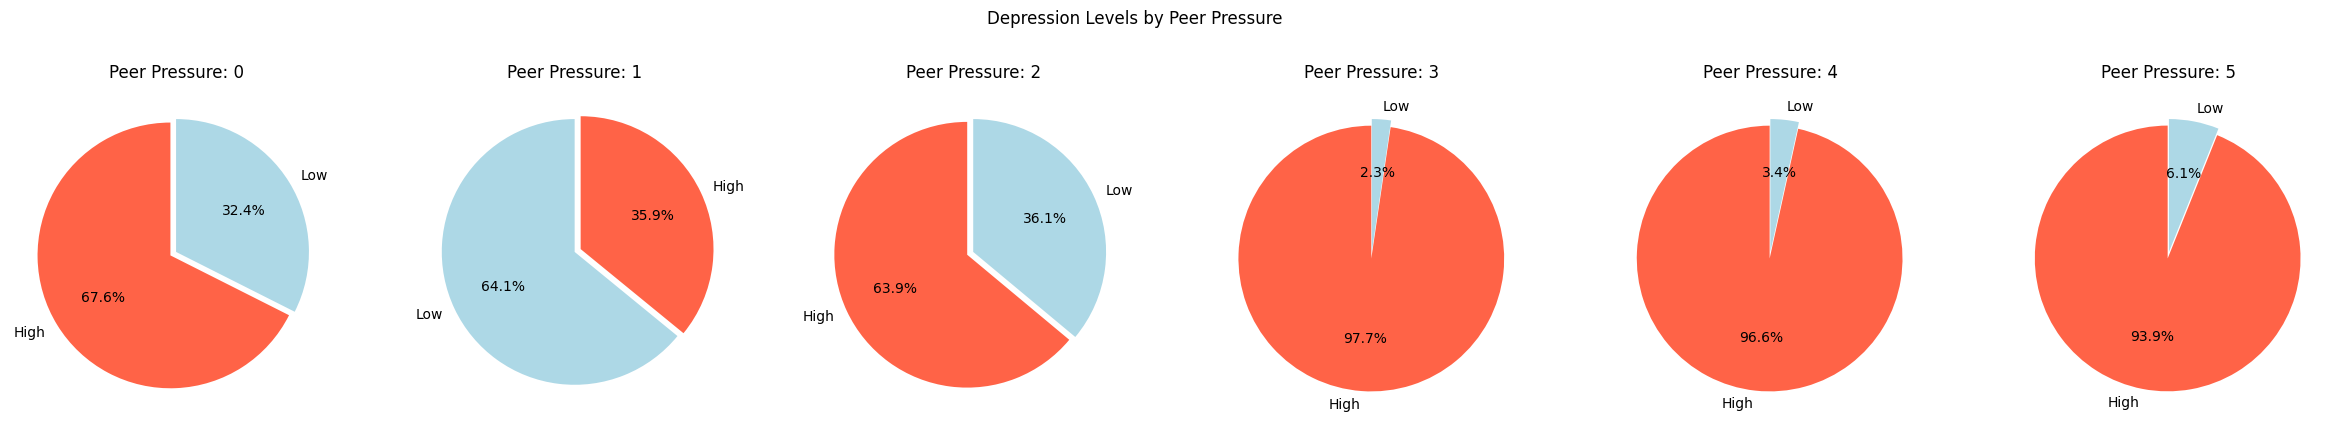

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
DF = pd.read_csv('StressLevelDataset.csv')
# Create High/Low depression labels
DF['depression_level'] = DF['depression'].apply(lambda x: 'High' if x >= 7 else 'Low')

# Unique peer pressure levels
peer_levels = DF['peer_pressure'].unique()

# Set up color scheme
colors = {'High': '#FF6347', 'Low': '#ADD8E6'}

# Plot one pie chart per peer pressure level
fig, axes = plt.subplots(1, len(peer_levels), figsize=(5 * len(peer_levels), 5))

for i, level in enumerate(sorted(peer_levels)):
    # Filter by peer pressure level
    group = DF[DF['peer_pressure'] == level]['depression_level'].value_counts()
    
    # Pie chart
    axes[i].pie(
        group,
        labels=group.index,
        autopct='%1.1f%%',
        colors=[colors[label] for label in group.index],
        startangle=90,
        explode=[0.05 if label == 'High' else 0 for label in group.index]
    )
    axes[i].set_title(f'Peer Pressure: {level}')

plt.suptitle('Depression Levels by Peer Pressure') # Overall title for all subplots

# Display all charts
plt.show()   

# 📊 Discussion: Graph Selection and Justification

In this mini project, four types of visualizations were selected to analyze the relationships between academic, lifestyle and social factors on student mental health. These graphs provide meaningful insights into how various features such as anxiety, depression, self-esteem and peer pressure interact within the dataset. Below is the discussion and reasoning behind the selection of each graph.

### 1. Violin Plot: Anxiety Level by Academic Performance

**Why this graph?**  
This plot displays both the **distribution** and **density** of anxiety levels across different categories of academic performance. By including a boxplot and individual data points, it gives a deeper understanding of where anxiety levels tend to cluster among students. This graph directly supports **Objective 1**, which aims to explore the relationship between academic-related stressors and mental health.

---

### 2. Bar Chart: Average Anxiety Level by Study Load

**Why this graph?**  
The bar chart allows for a clear visual comparison of **average anxiety levels** across varying **study load** categories. It helps identify trends in how workload may influence students' stress and anxiety levels, which is also part of **Objective 1**. Bar charts are simple yet effective tools for highlighting category-based differences.

---

### 3. Grouped Bar Chart: Average Headache Levels by Living Conditions

**Why this graph?**  
This grouped bar chart provides insight into the impact of **living conditions** on the physical symptom of headaches among students. By comparing average headache levels across different environments, this graph highlights how lifestyle and environmental factors contribute to students’ psychological well-being. It directly supports **Objective 2**, which focuses on lifestyle and environmental influences on mental health.

---

### 4. Scatter Plot: Depression vs. Self-Esteem with Peer Pressure Coloring

**Why this graph?**  
The scatter plot was chosen to examine the **relationship between self-esteem and depression**. By incorporating **peer pressure** as the color parameter, this graph adds a third layer of insight. It allows us to see if certain combinations (e.g., low self-esteem and high peer pressure) result in more severe depression. This supports **Objective 3**, which focuses on the impact of personal and social support on mental health.

---

### 5. Pie Charts: Depression Level (High/Low) by Peer Pressure Category

**Why this graph?**  
Pie charts help show the **distribution of depression levels** (High vs. Low) across different **peer pressure levels**. By separating the visualizations for each peer pressure level, we can directly compare how the proportion of students with high depression changes as peer pressure increases. This further reinforces the analysis from the scatter plot and aligns with **Objective 3**.

---

## Summary

| Graph Type          | Purpose                                                     | Objective Linked       |
|---------------------|-------------------------------------------------------------|------------------------|
| Violin Plot         | Visualizing anxiety distribution by academic performance     | Objective 1            |
| Bar Chart           | Comparing average anxiety by study load                      | Objective 1            |
| Grouped Bar Chart   | Comparing average headache by living conditions              | Objective 2            |
| Scatter Plot        | Exploring depression vs. self-esteem + peer pressure         | Objective 3            |
| Pie Charts          | Showing depression severity within peer pressure levels      | Objective 3            |

By using a variety of visualizations, the dashboard ensures a well-rounded and interactive approach to analyzing student mental health, supporting both academic insights and practical applications.


# 🚫 Discussion: Unselected Graphs and Justification

While several visualizations were created during the analysis process, not all were included in the final dashboard. Below are two graphs that were excluded, along with the reasons for their omission.

---

### 1. Line Chart: Average Headache Level by Living Conditions

In [25]:
import pandas as pd
import plotly.express as px

# Load your dataset
DF = pd.read_csv('StressLevelDataset.csv')

# Group by living condition and calculate average headache
line_data = DF.groupby('living_conditions')['headache'].mean().reset_index()

# Create line chart
fig = px.line(
    line_data,
    x='living_conditions',
    y='headache',
    markers=True,
    title='Average Headache Level by Living Conditions',
    labels={'living_conditions': 'Living Conditions', 'headache': 'Average Headache Level'},
    line_shape='linear'
)

fig.show()


**Why this graph was not selected?**

This line chart does not effectively fulfill Objective 2, which aims to investigate how environmental conditions affect psychological well-being. Although it presents a general trend of headache levels across different living conditions, it lacks the comparative clarity and categorical separation that would help emphasize specific variations. The grouped bar chart was preferred instead, as it better highlights differences in headache levels across living condition categories.

### 2. ❌ Pie Chart: Overall Depression Level Distribution

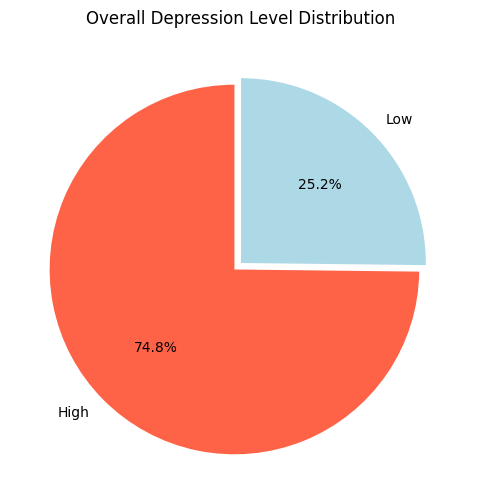

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Create high/low depression category
DF['depression_level'] = DF['depression'].apply(lambda x: 'High' if x >= 7 else 'Low')

# Count distribution
counts = DF['depression_level'].value_counts()

# Pie chart
colors = ['#FF6347', '#ADD8E6']  # High: Tomato red, Low: Light blue
explode = [0.05, 0]  # Slightly separate the 'High' slice

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Overall Depression Level Distribution')
plt.show()


**Why this graph was not selected?**

This graph does not address the deeper aspects of Objective 3, which focuses on personal and social support factors (such as peer pressure and self-esteem). It merely shows the overall proportion of students with high or low depression, without any breakdown by relevant social or psychological variables. Instead, the chosen scatter plot and categorized pie charts offer more actionable insights by examining depression levels within different peer pressure categories.

---

These unselected graphs were still valuable during the exploratory data analysis phase, helping to guide the development of more insightful and objective-aligned visualizations.

### Conclusion

Through this project, all four research objectives were effectively addressed. The analysis revealed that academic factors like study load and academic performance significantly contribute to students’ stress and anxiety levels, fulfilling the first objective. The second objective was achieved by showing how lifestyle and environmental elements such as sleep quality and living conditions are closely linked to psychological well-being, particularly symptoms like depression and headaches. The third objective focused on social and personal factors, and findings confirmed that self-esteem and peer pressure play a crucial role in shaping students’ mental health. Lastly, the development of an interactive Streamlit dashboard successfully met the fourth objective by providing a user-friendly platform for visualizing data trends and enabling deeper exploration of mental health indicators. Overall, this project offers valuable insights and a practical tool for understanding and improving student mental health.